In [113]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import os
import objaverse
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from src import *

objaverse._VERSIONED_PATH=os.path.join('../.objaverse', "hf-objaverse-v1")
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Filter only objects having one diffusion texture
##### ℹ️ This notebook requires ShapeNetCore models in the `.shapenet/` root folder. It also requires the `statistics.parquet` file generated by `compute_statistics.py`.
This notebook downloads all the filtered objects and filter them based on the the textures they have.

In [141]:
statistics = pd.read_parquet("statistics.parquet")
statistics.head()

,meshCount,uvCount,diffuseCount,faceCount,valid
uid,,,,,
b95c595576a3846aad0ab2bac067d6b1,1,1,1,9162,True
369e83693c7445a48ee2f8110bce2d6b,1,1,3,788,False
16a1355b8749dcda33f93820d08ac745,1,1,13,1014,False
835ca5f3809182e86d1ffe1a45470ad7,1,1,1,10442,True
5f51f5e0607167b4178e7d331e641179,1,1,4,6854,False


## How many OBJ files have 1 Mesh, 1 UV map and 1 diffuse texture?

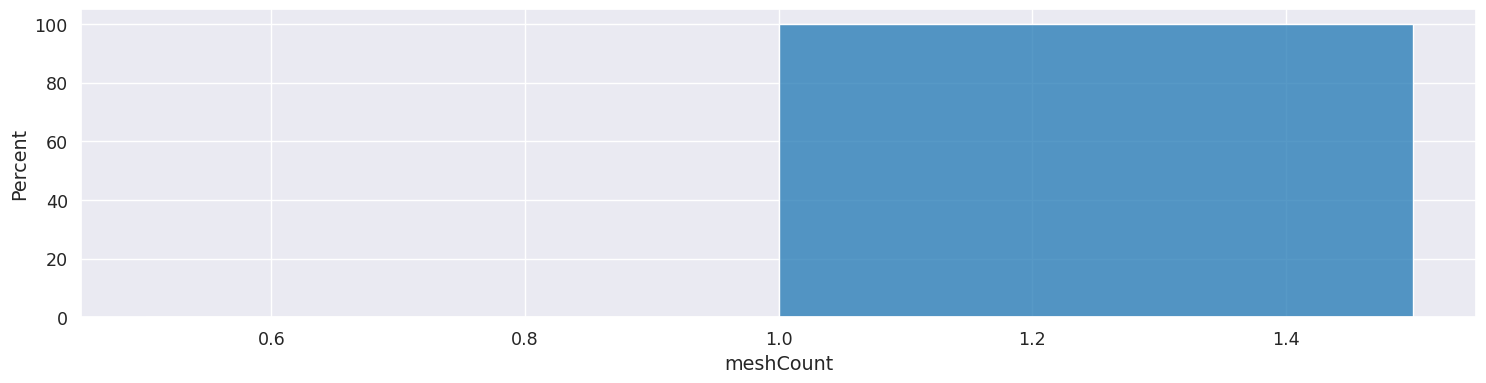

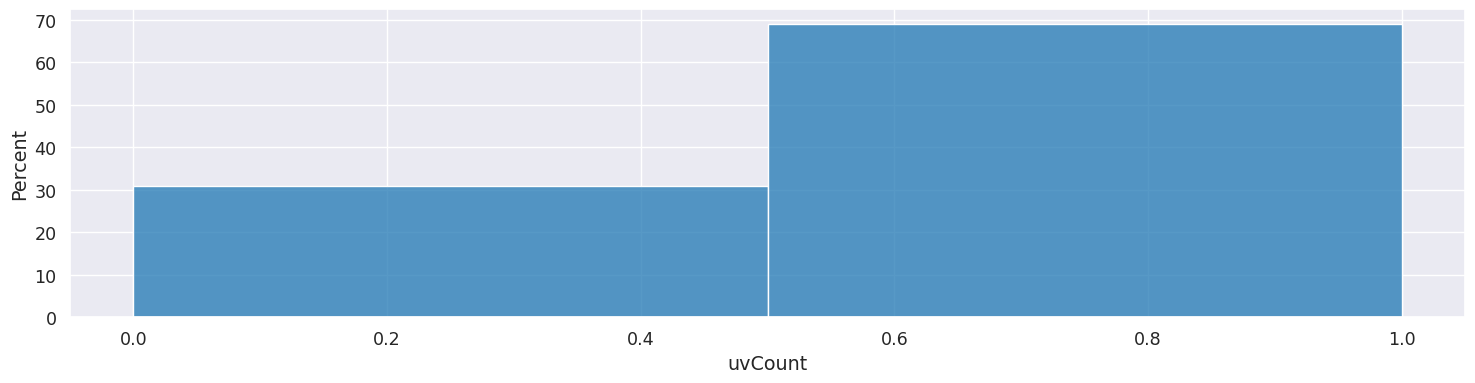

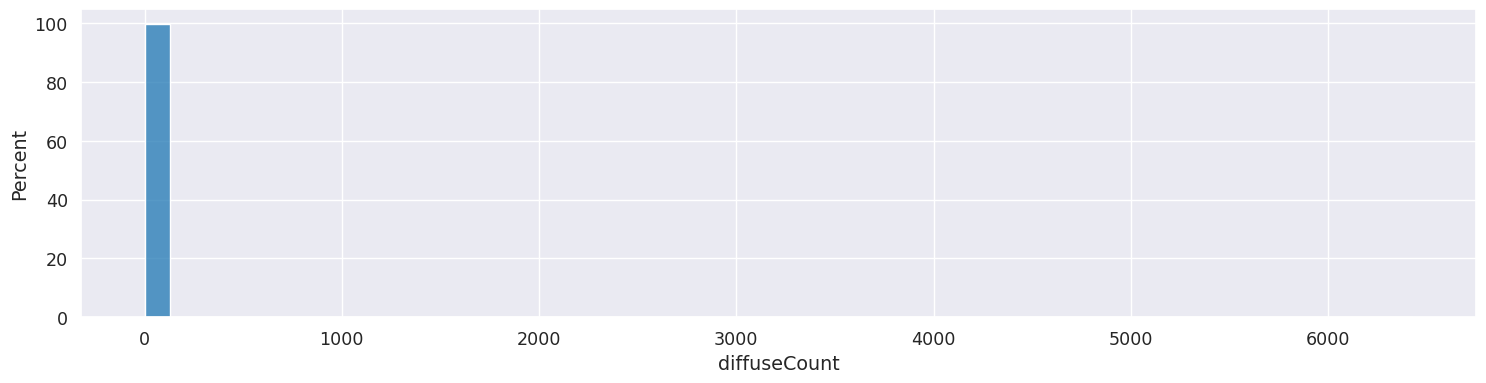

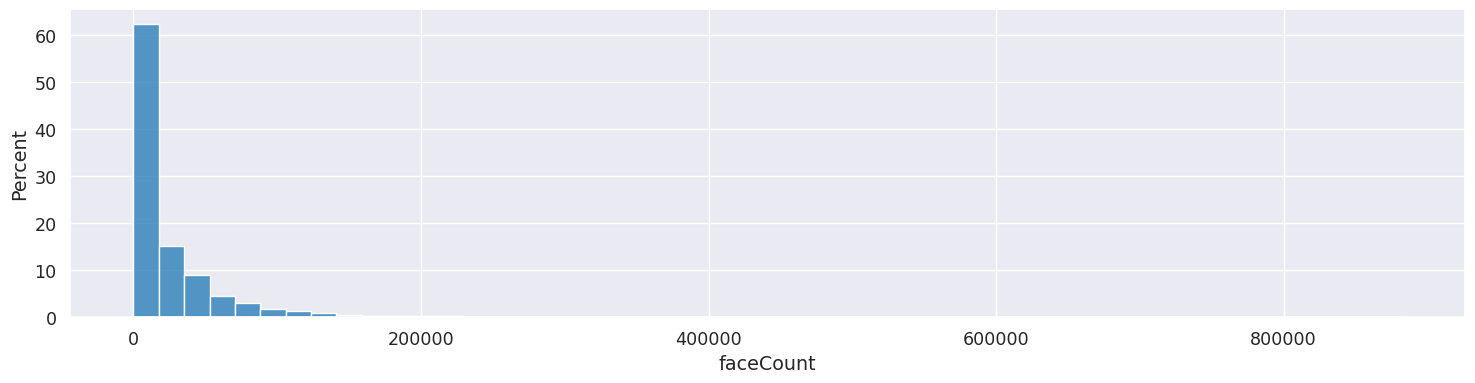

In [142]:
for data in [statistics["meshCount"], statistics["uvCount"], statistics["diffuseCount"], statistics["faceCount"]]:
    plt.figure(figsize=(18, 4))
    sns.histplot(data, bins=min(50, max(data) + 1), stat="percent")
    plt.show()

In [132]:
MIN_FACES, MAX_FACES = 1, 25_000
filtered_uids = statistics[
    (statistics["meshCount"] == 1)
    & (statistics["uvCount"] == 1)
    & (statistics["diffuseCount"] == 1)
    & (statistics["faceCount"] > MIN_FACES)
    & (statistics["faceCount"] < MAX_FACES)
].index
f"{len(filtered_uids)/len(statistics):.2%} of OBJs ({len(filtered_uids)}) meet the requirements"

'16.00% of OBJs (3694) meet the requirements'

##### 👉🏼 About $16\%$ of OBJ files contain 1 mesh, 1 UV, 1 diffuse and has a suitable number of faces.

In [ ]:
statistics["valid"] = statistics.index.isin(filtered_uids)
statistics.to_parquet("statistics.parquet")